# Initial Setup

We import key functions to train a machine learning model as well as download the dataset we want to use.

Last but not least, we define a function that we use to plot a decision tree

In [2]:
#Importing Functions
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#Downloading the dataset
caravan = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/caravan_data.csv", sep=";")

#Defining a function for plotting decision trees
def plot_tree_classification(treemodel, X):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,class_names=['0','1'],feature_names = X.columns,proportion=True,precision=2, impurity=False)

# Inspect the Data Set

In [3]:
caravan

,SOC_customer_subtype,SOC_number_houses,SOC_avg_household_size,SOC_avg_age,SOC_customer_main_type,SOC_is_roman_catholic,SOC_is_protestant,SOC_other_religion,SOC_no_religion,SOC_is_married,...,PROD_number_private_accident,PROD_number_family_accident,PROD_number_disability,PROD_number_fire,PROD_number_surfboard,PROD_number_boat,PROD_number_bicycle,PROD_number_property,PROD_number_social_security,CARAVAN
0,10,1,4,3,3,5,3,1,1,8,...,0,0,0,1,0,0,0,0,0,1
1,6,1,3,3,2,2,5,0,3,9,...,0,0,0,0,0,0,0,0,0,1
2,10,1,3,3,3,2,3,1,3,7,...,0,0,0,1,0,0,0,0,0,1
3,3,1,2,3,1,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,1
4,6,1,4,3,2,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,1,3,2,2,0,7,2,0,7,...,0,0,0,1,0,0,0,0,1,0
996,31,1,2,4,7,0,2,2,5,7,...,0,0,0,1,0,0,0,0,0,0
997,35,1,2,4,8,0,4,0,5,3,...,0,0,0,0,0,0,0,0,0,0
998,38,1,3,3,9,0,3,3,4,6,...,0,0,0,0,0,0,0,0,0,0


# Lab Session 1: Training a first Decision Tree

The dataset "default" consists of the label "CARAVAN" and 13 other features. To train a mashine learning model, we need to separate them into two objects. The label is called "y" and the features are called "X".


In [4]:
X = caravan.drop("CARAVAN",axis=1) #Create a copy of the "caravan" data set with deleting "CARAVAN" feature.
y = caravan["CARAVAN"] #Saving the feature CARAVAN as"y"

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: CARAVAN, Length: 1000, dtype: int64

We first train a decision tree with a "max_depth" of 2. After splitting twice, the process is stopped.

In [6]:
tree = DecisionTreeClassifier(max_depth=2).fit(X,y)

Plotting the trained decision tree

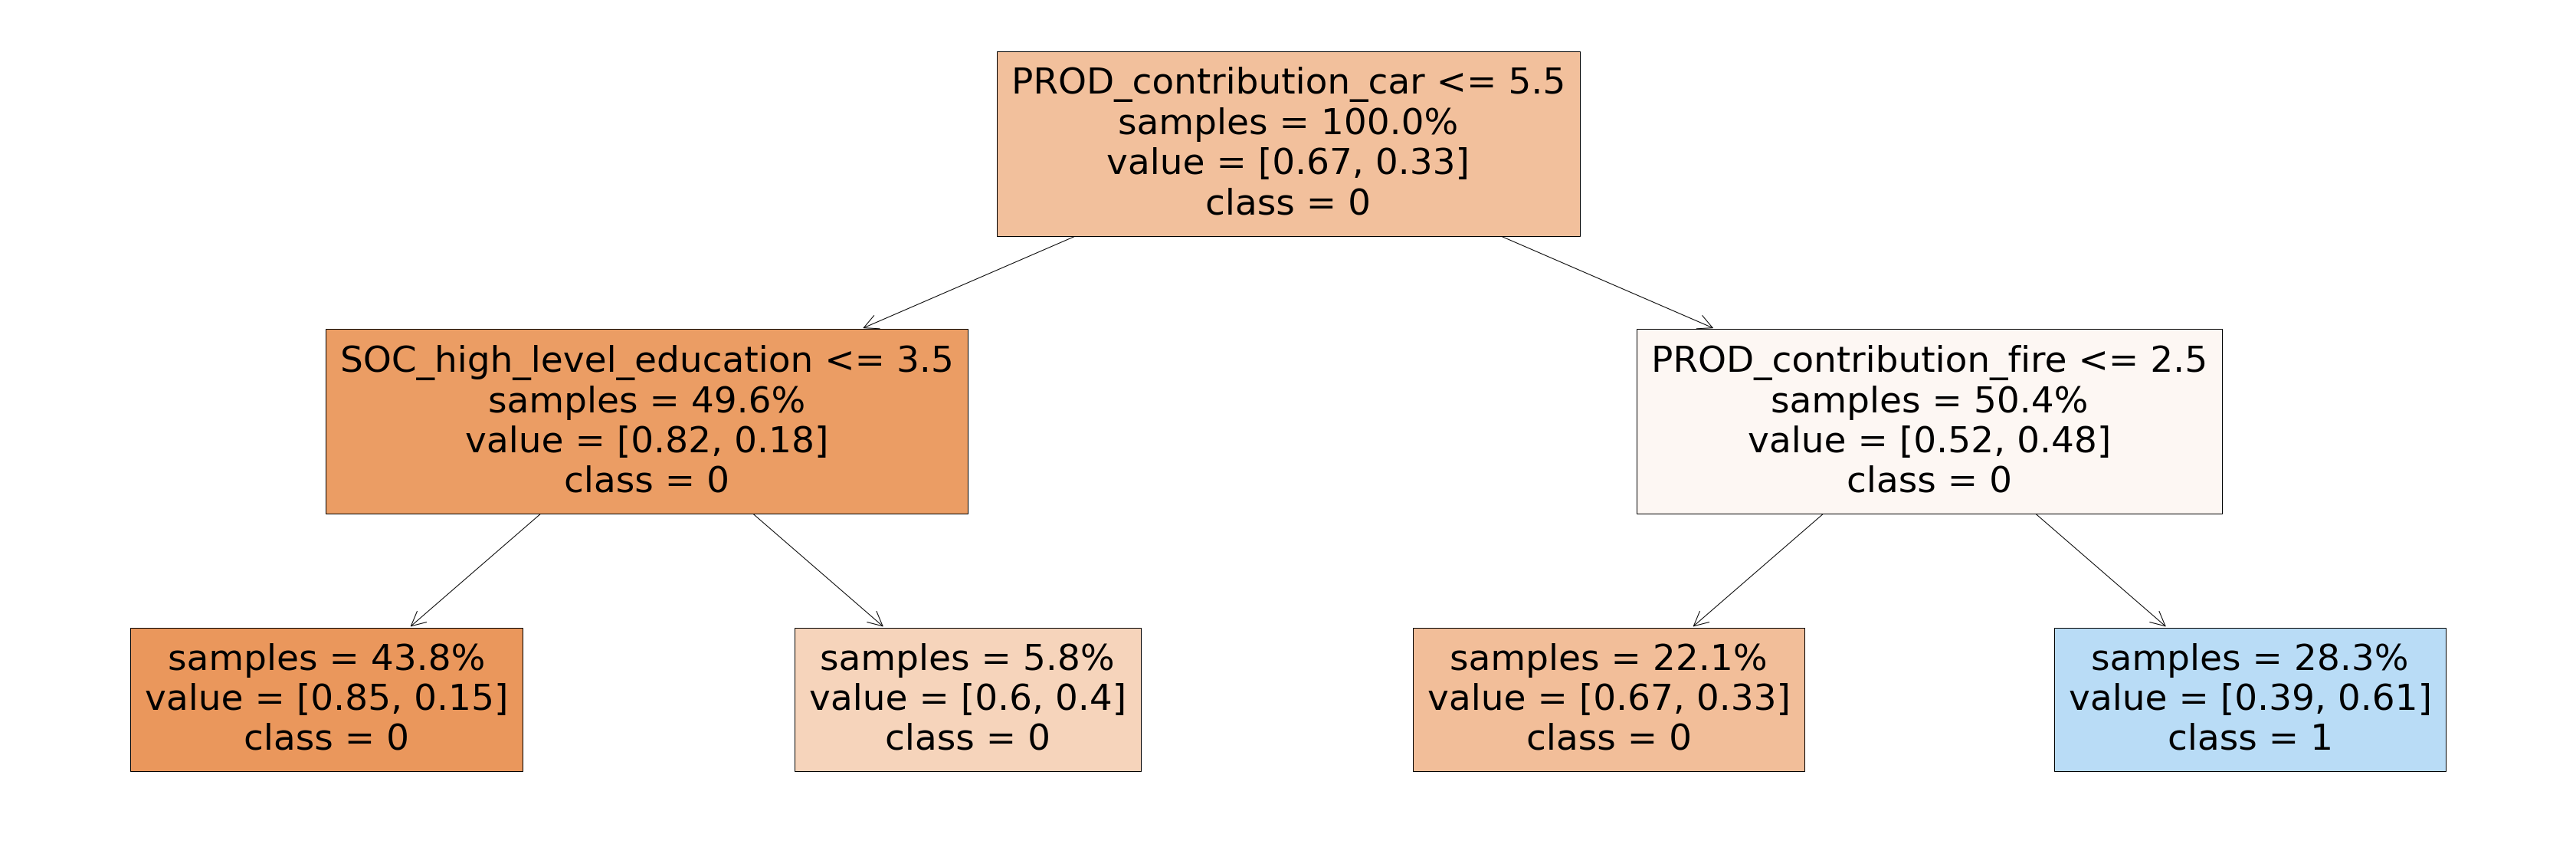

In [7]:
plot_tree_classification(tree, X)

We create predictions: "predict_proba" gives us the predictions. The first column gives the probability that a customer **will not** purchase a caravan insurance. The second column gives the probability that a customer is buying caravan insurance. Logically, the values add up to 1.

In [8]:
tree.predict_proba(X)

array([[0.39222615, 0.60777385],
       [0.67420814, 0.32579186],
       [0.60344828, 0.39655172],
       ...,
       [0.67420814, 0.32579186],
       [0.84931507, 0.15068493],
       [0.84931507, 0.15068493]])

"predict" provides us with the assignment to the classes "purchase" and "no purchase". 1 means that a customer will purchase a caravan insurance, 0 means the customer will not purchase. All customers with an estimated purchasing probability of >50% are set to the value 1.

In [9]:
tree.predict(X)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Let's play around with Hyperparameters

Hyperparameters to be varied:

- **max_depth:** Maximum number of splits allowed.
- **min_samples_leaf:** The minimum number of clients that must be present in a leaf node.

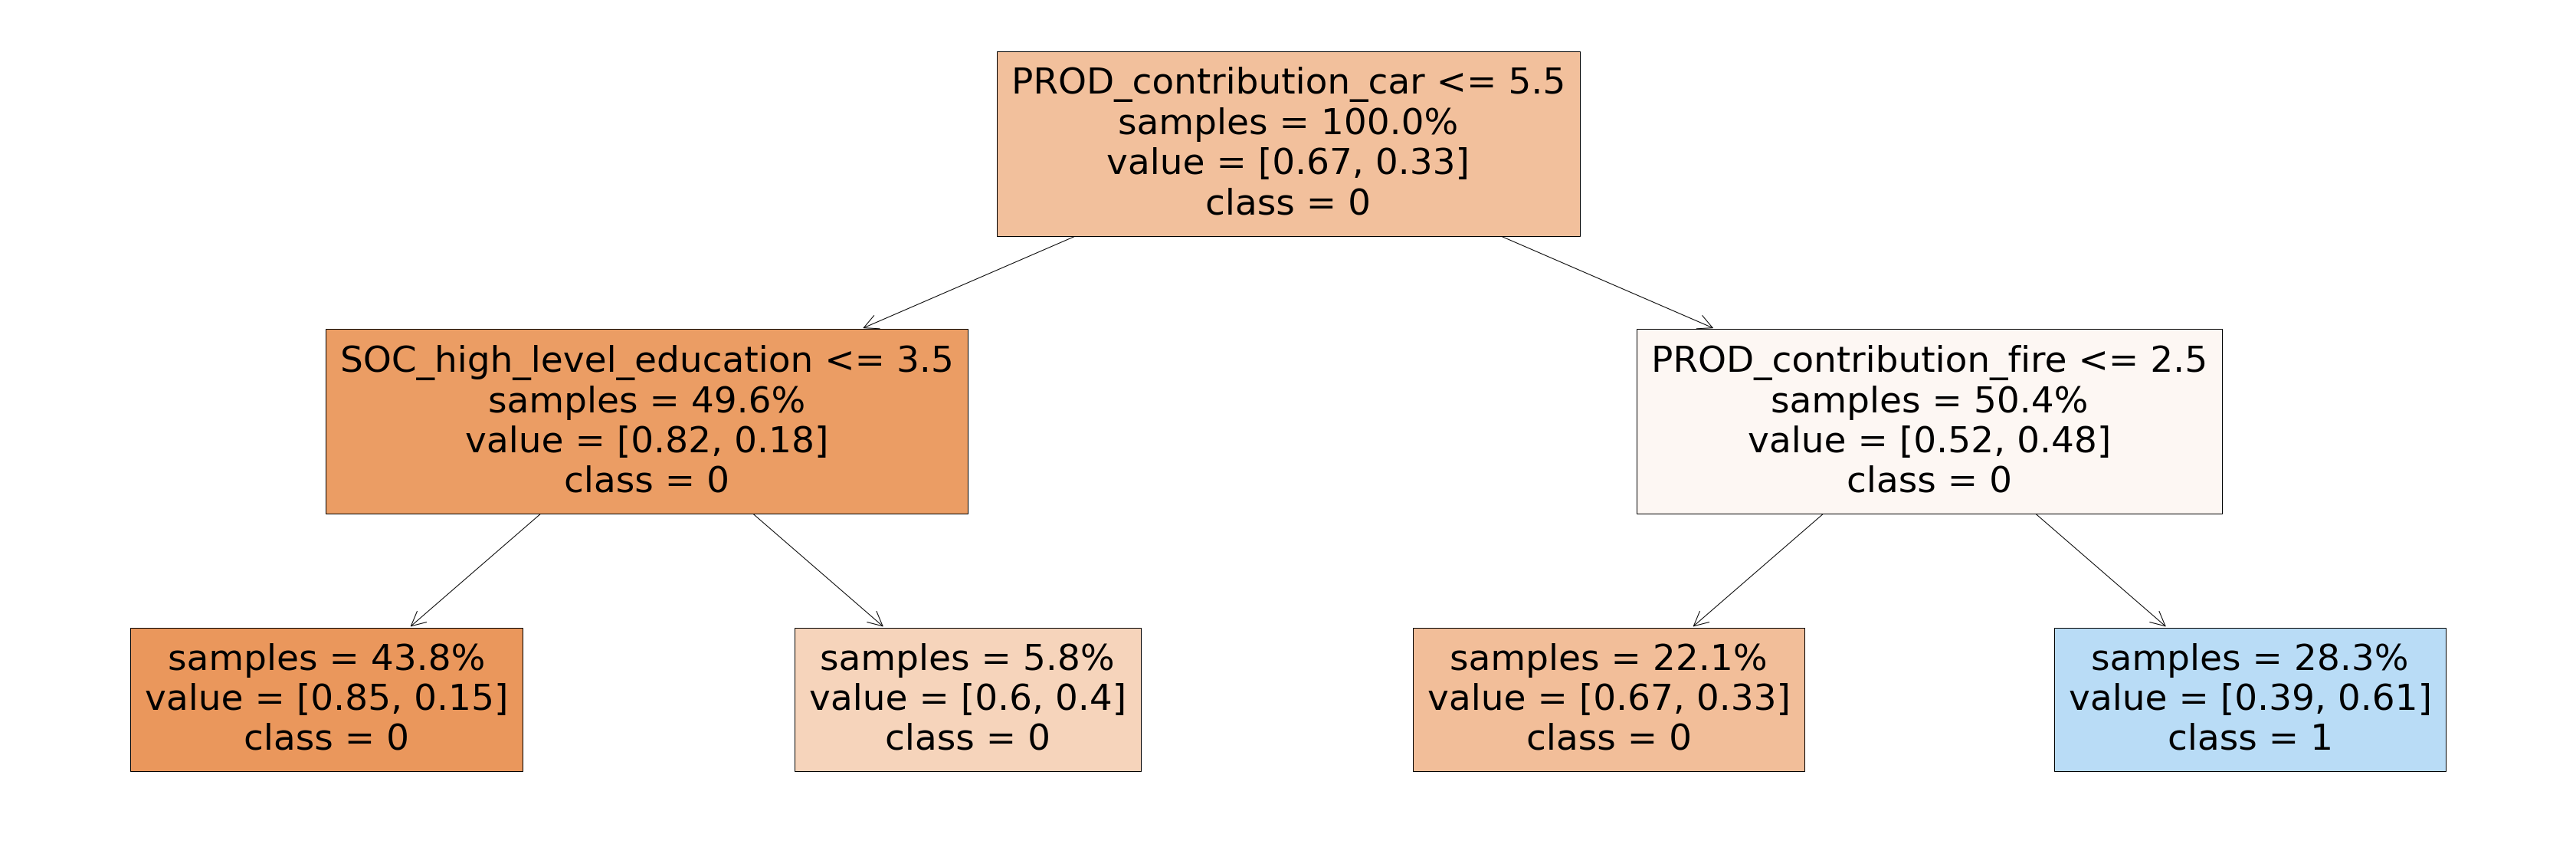

In [10]:
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1).fit(X,y)
plot_tree_classification(tree, X)

# Lab Session 2: Determining the Accuracy of our Predictions

To determine if the predictions made are accurate, we need to split our data into test and training data. We have already created two partial datasets in a previous step: y and X.

These are now transformed into a test and a training part respectively

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

We train again a new decision tree with a max_depth of 3

In [12]:
tree = DecisionTreeClassifier(max_depth=6, random_state=1).fit(X_train, y_train)

We create predictions and store them in the "y_pred" object.

In [13]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], d

In [14]:
y_test

507    0
818    0
452    0
368    0
242    1
      ..
459    0
415    0
61     1
347    0
349    0
Name: CARAVAN, Length: 300, dtype: int64

Determine the accuracy of a model:

In [15]:
accuracy_score(y_test,y_pred)

0.6533333333333333